In [1]:
import csv 
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
random_seed = 42
Dataset='model/keypoint_classifier/keypoint.csv'
model_saving_path = 'model/keypoint_classifier/handsigns.h5'
TFlite_saving_path = 'model/keypoint_classifier/handsign_tflite.tflite'


In [3]:
Num_Classes = 30 #classes indicate no of alphabets


In [4]:
X_Dataset = np.loadtxt(Dataset,delimiter =',',dtype = "float32",usecols = list(range(1,(21*2)+1) ))
Y_Dataset = np.loadtxt(Dataset,delimiter =',',dtype = "int32",usecols =(0))

In [5]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X_Dataset,Y_Dataset,train_size=0.75,random_state= random_seed)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40,activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(30,activation = 'relu'),
    tf.keras.layers.Dense(Num_Classes,activation="softmax"),
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │         1,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,880 (15.16 KB)

 Trainable params: 3,880 (15.16 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
saving_callback = tf.keras.callbacks.ModelCheckpoint(model_saving_path,verbose = 1,save_weights_only=False)

In [9]:
earlyending_callback = tf.keras.callbacks.EarlyStopping(patience=20,verbose=1)

In [10]:
model.compile(
    optimizer ='adam',
    loss = "sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_Train,Y_Train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_Test,Y_Test),
    callbacks=[saving_callback,earlyending_callback]
          )

Epoch 1/1000
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0406 - loss: 3.4038
Epoch 1: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.0427 - loss: 3.3985 - val_accuracy: 0.1760 - val_loss: 3.2316
Epoch 2/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1173 - loss: 3.2311
Epoch 2: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1200 - loss: 3.2229 - val_accuracy: 0.2001 - val_loss: 3.0116
Epoch 3/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1693 - loss: 3.0190
Epoch 3: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1705 - loss: 3.0137 - val_accuracy: 0.2686 - val_loss: 2.7010
Epoch 4/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2200 - loss: 2.7803
Epoch 4: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2203 - loss: 2.7769 - val_accuracy: 0.3991 - val_loss: 2.3885
Epoch 5/1000
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2691 - loss: 2.5667
Epoch 5: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2703 - loss: 2.5601 - val_accuracy: 0.4789 - val_loss: 2.0915
Epoch 6/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3019 - loss: 2.3370
Epoch 6: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3046 - loss: 2.3298 - val_accuracy: 0.5912 - val_loss: 1.8489
Epoch 7/1000
33/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3331 - loss: 2.1709
Epoch 7: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3342 - loss: 2.1715 - val_accuracy: 0.6421 - val_loss: 1.6745
Epoch 8/1000
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3640 - loss: 2.0596
Epoch 8: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3653 - loss: 2.0562 - val_accuracy: 0.6597 - val_loss: 1.5244
Epoch 9/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3781 - loss: 1.9945
Epoch 9: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3782 - loss: 1.9938 - val_accuracy: 0.6849 - val_loss: 1.4228
Epoch 10/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3960 - loss: 1.9074
Epoch 10: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3960 - loss: 1.9076 - val_accuracy: 0.6672 - val_loss: 1.3537
Epoch 11/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3941 - loss: 1.8889
Epoch 11: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3955 - loss: 1.8858 - val_accuracy: 0.6988 - val_loss: 1.3092
Epoch 12/1000
32/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4085 - loss: 1.8459
Epoch 12: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4108 - loss: 1.8413 - val_accuracy: 0.7079 - val_loss: 1.2508
Epoch 13/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4408 - loss: 1.7484
Epoch 13: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4397 - loss: 1.7505 - val_accuracy: 0.7132 - val_loss: 1.2014
Epoch 14/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4509 - loss: 1.7193
Epoch 14: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4505 - loss: 1.7195 - val_accuracy: 0.7448 - val_loss: 1.1505
Epoch 15/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4446 - loss: 1.7016
Epoch 15: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4449 - loss: 1.7011 - val_accuracy: 0.7298 - val_loss: 1.1186
Epoch 16/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4489 - loss: 1.6870
Epoch 16: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4490 - loss: 1.6866 - val_accuracy: 0.7475 - val_loss: 1.0927
Epoch 17/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4528 - loss: 1.6570
Epoch 17: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4548 - loss: 1.6559 - val_accuracy: 0.7539 - val_loss: 1.0594
Epoch 18/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4775 - loss: 1.5881 
Epoch 18: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4772 - loss: 1.5903 - val_accuracy: 0.7528 - val_loss: 1.0380
Epoch 19/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4803 - loss: 1.6395
Epoch 19: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4801 - loss: 1.6362 - val_accuracy: 0.7400 - val_loss: 1.0046
Epoch 20/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4809 - loss: 1.5784
Epoch 20: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4812 - loss: 1.5786 - val_accuracy: 0.7608 - val_loss: 0.9909
Epoch 21/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4924 - loss: 1.5532
Epoch 21: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4922 - loss: 1.5540 - val_accuracy: 0.7603 - val_loss: 0.9648
Epoch 22/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5085 - loss: 1.5424
Epoch 22: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5082 - loss: 1.5426 - val_accuracy: 0.7764 - val_loss: 0.9510
Epoch 23/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5082 - loss: 1.5041
Epoch 23: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5083 - loss: 1.5055 - val_accuracy: 0.7758 - val_loss: 0.9210
Epoch 24/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4969 - loss: 1.5295
Epoch 24: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4972 - loss: 1.5289 - val_accuracy: 0.8010 - val_loss: 0.9149
Epoch 25/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5215 - loss: 1.4714
Epoch 25: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5200 - loss: 1.4752 - val_accuracy: 0.7871 - val_loss: 0.8902
Epoch 26/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5216 - loss: 1.4731
Epoch 26: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5211 - loss: 1.4739 - val_accuracy: 0.7812 - val_loss: 0.8890
Epoch 27/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5302 - loss: 1.4478
Epoch 27: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5288 - loss: 1.4495 - val_accuracy: 0.8117 - val_loss: 0.8703
Epoch 28/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5348 - loss: 1.4144
Epoch 28: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5341 - loss: 1.4164 - val_accuracy: 0.8010 - val_loss: 0.8491
Epoch 29/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5323 - loss: 1.4521
Epoch 29: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5323 - loss: 1.4520 - val_accuracy: 0.8095 - val_loss: 0.8373
Epoch 30/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5317 - loss: 1.4527
Epoch 30: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5321 - loss: 1.4496 - val_accuracy: 0.8175 - val_loss: 0.8352
Epoch 31/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5521 - loss: 1.3684
Epoch 31: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5519 - loss: 1.3691 - val_accuracy: 0.8373 - val_loss: 0.8142
Epoch 32/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5347 - loss: 1.4188
Epoch 32: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5362 - loss: 1.4158 - val_accuracy: 0.8315 - val_loss: 0.8013
Epoch 33/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5441 - loss: 1.3724
Epoch 33: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5444 - loss: 1.3746 - val_accuracy: 0.8454 - val_loss: 0.7979
Epoch 34/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5467 - loss: 1.3741
Epoch 34: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5472 - loss: 1.3737 - val_accuracy: 0.8272 - val_loss: 0.7828
Epoch 35/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5446 - loss: 1.4027
Epoch 35: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5464 - loss: 1.3965 - val_accuracy: 0.8395 - val_loss: 0.7733
Epoch 36/1000
34/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5659 - loss: 1.3260
Epoch 36: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5664 - loss: 1.3269 - val_accuracy: 0.8352 - val_loss: 0.7584
Epoch 37/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5608 - loss: 1.3311
Epoch 37: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5608 - loss: 1.3310 - val_accuracy: 0.8368 - val_loss: 0.7407
Epoch 38/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5667 - loss: 1.3158
Epoch 38: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5676 - loss: 1.3150 - val_accuracy: 0.8486 - val_loss: 0.7362
Epoch 39/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5591 - loss: 1.3132
Epoch 39: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5599 - loss: 1.3131 - val_accuracy: 0.8507 - val_loss: 0.7264
Epoch 40/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5845 - loss: 1.2580
Epoch 40: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5843 - loss: 1.2586 - val_accuracy: 0.8641 - val_loss: 0.7164
Epoch 41/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5699 - loss: 1.2926
Epoch 41: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5709 - loss: 1.2901 - val_accuracy: 0.8571 - val_loss: 0.7105
Epoch 42/1000
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5844 - loss: 1.2719
Epoch 42: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5845 - loss: 1.2717 - val_accuracy: 0.8593 - val_loss: 0.6912
Epoch 43/1000
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6062 - loss: 1.2329
Epoch 43: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6041 - loss: 1.2336 - val_accuracy: 0.8587 - val_loss: 0.6837
Epoch 44/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5979 - loss: 1.2303
Epoch 44: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5979 - loss: 1.2302 - val_accuracy: 0.8475 - val_loss: 0.6750
Epoch 45/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5857 - loss: 1.2513
Epoch 45: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5859 - loss: 1.2510 - val_accuracy: 0.8593 - val_loss: 0.6700
Epoch 46/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5943 - loss: 1.2440
Epoch 46: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5939 - loss: 1.2422 - val_accuracy: 0.8646 - val_loss: 0.6619
Epoch 47/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6008 - loss: 1.2150
Epoch 47: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6009 - loss: 1.2154 - val_accuracy: 0.8550 - val_loss: 0.6612
Epoch 48/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5942 - loss: 1.2141
Epoch 48: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5950 - loss: 1.2133 - val_accuracy: 0.8668 - val_loss: 0.6510
Epoch 49/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6048 - loss: 1.1848
Epoch 49: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6041 - loss: 1.1867 - val_accuracy: 0.8716 - val_loss: 0.6562
Epoch 50/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5976 - loss: 1.2167
Epoch 50: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5980 - loss: 1.2165 - val_accuracy: 0.8737 - val_loss: 0.6495
Epoch 51/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6170 - loss: 1.1593
Epoch 51: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6155 - loss: 1.1623 - val_accuracy: 0.8625 - val_loss: 0.6491
Epoch 52/1000
32/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6229 - loss: 1.1565
Epoch 52: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6216 - loss: 1.1548 - val_accuracy: 0.8828 - val_loss: 0.6218
Epoch 53/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5902 - loss: 1.2090
Epoch 53: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5906 - loss: 1.2083 - val_accuracy: 0.8801 - val_loss: 0.6219
Epoch 54/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6256 - loss: 1.1580
Epoch 54: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6247 - loss: 1.1584 - val_accuracy: 0.8834 - val_loss: 0.6161
Epoch 55/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6276 - loss: 1.1384
Epoch 55: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6271 - loss: 1.1402 - val_accuracy: 0.8823 - val_loss: 0.5985
Epoch 56/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6257 - loss: 1.1293
Epoch 56: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6251 - loss: 1.1298 - val_accuracy: 0.8753 - val_loss: 0.6066
Epoch 57/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6245 - loss: 1.1463
Epoch 57: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6247 - loss: 1.1462 - val_accuracy: 0.8850 - val_loss: 0.5998
Epoch 58/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6049 - loss: 1.1926
Epoch 58: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6057 - loss: 1.1904 - val_accuracy: 0.8737 - val_loss: 0.5975
Epoch 59/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6116 - loss: 1.1381
Epoch 59: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6130 - loss: 1.1361 - val_accuracy: 0.8828 - val_loss: 0.5842
Epoch 60/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6091 - loss: 1.1371
Epoch 60: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6128 - loss: 1.1322 - val_accuracy: 0.8711 - val_loss: 0.5879
Epoch 61/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6432 - loss: 1.0959
Epoch 61: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6425 - loss: 1.0974 - val_accuracy: 0.8705 - val_loss: 0.5790
Epoch 62/1000
33/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6459 - loss: 1.0642
Epoch 62: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6462 - loss: 1.0669 - val_accuracy: 0.8748 - val_loss: 0.5646
Epoch 63/1000
34/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6430 - loss: 1.0945
Epoch 63: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6417 - loss: 1.0940 - val_accuracy: 0.8732 - val_loss: 0.5626
Epoch 64/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6440 - loss: 1.0717
Epoch 64: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6438 - loss: 1.0740 - val_accuracy: 0.8818 - val_loss: 0.5535
Epoch 65/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6479 - loss: 1.0756
Epoch 65: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6470 - loss: 1.0763 - val_accuracy: 0.8791 - val_loss: 0.5605
Epoch 66/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6476 - loss: 1.0672
Epoch 66: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6469 - loss: 1.0688 - val_accuracy: 0.8866 - val_loss: 0.5584
Epoch 67/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6476 - loss: 1.0861
Epoch 67: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6478 - loss: 1.0852 - val_accuracy: 0.8850 - val_loss: 0.5621
Epoch 68/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6608 - loss: 1.0418
Epoch 68: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6599 - loss: 1.0431 - val_accuracy: 0.8914 - val_loss: 0.5406
Epoch 69/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6585 - loss: 1.0466
Epoch 69: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6588 - loss: 1.0446 - val_accuracy: 0.8860 - val_loss: 0.5352
Epoch 70/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6580 - loss: 1.0425
Epoch 70: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6579 - loss: 1.0426 - val_accuracy: 0.8876 - val_loss: 0.5294
Epoch 71/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6494 - loss: 1.0473
Epoch 71: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6498 - loss: 1.0464 - val_accuracy: 0.8898 - val_loss: 0.5294
Epoch 72/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6451 - loss: 1.0576
Epoch 72: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6448 - loss: 1.0584 - val_accuracy: 0.8759 - val_loss: 0.5311
Epoch 73/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6675 - loss: 1.0085
Epoch 73: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6670 - loss: 1.0090 - val_accuracy: 0.8887 - val_loss: 0.5271
Epoch 74/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6629 - loss: 1.0224
Epoch 74: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6631 - loss: 1.0233 - val_accuracy: 0.8967 - val_loss: 0.5119
Epoch 75/1000
30/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6513 - loss: 1.0354
Epoch 75: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6561 - loss: 1.0300 - val_accuracy: 0.8935 - val_loss: 0.5101
Epoch 76/1000
30/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6656 - loss: 1.0068
Epoch 76: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6668 - loss: 1.0068 - val_accuracy: 0.8941 - val_loss: 0.5107
Epoch 77/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6582 - loss: 1.0281
Epoch 77: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6589 - loss: 1.0261 - val_accuracy: 0.8989 - val_loss: 0.5112
Epoch 78/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6860 - loss: 0.9800
Epoch 78: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6849 - loss: 0.9817 - val_accuracy: 0.9048 - val_loss: 0.5017
Epoch 79/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6670 - loss: 0.9969
Epoch 79: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6665 - loss: 0.9976 - val_accuracy: 0.8818 - val_loss: 0.5039
Epoch 80/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6704 - loss: 1.0211
Epoch 80: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6709 - loss: 1.0113 - val_accuracy: 0.8973 - val_loss: 0.4899
Epoch 81/1000
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6858 - loss: 0.9550
Epoch 81: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6850 - loss: 0.9581 - val_accuracy: 0.8994 - val_loss: 0.4842
Epoch 82/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6778 - loss: 0.9891
Epoch 82: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6777 - loss: 0.9888 - val_accuracy: 0.8978 - val_loss: 0.4895
Epoch 83/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6857 - loss: 0.9457
Epoch 83: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6847 - loss: 0.9473 - val_accuracy: 0.8919 - val_loss: 0.4876
Epoch 84/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6915 - loss: 0.9584
Epoch 84: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6899 - loss: 0.9609 - val_accuracy: 0.8994 - val_loss: 0.4902
Epoch 85/1000
34/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6777 - loss: 0.9684
Epoch 85: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6789 - loss: 0.9670 - val_accuracy: 0.8914 - val_loss: 0.4805
Epoch 86/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6810 - loss: 0.9716
Epoch 86: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6830 - loss: 0.9685 - val_accuracy: 0.8978 - val_loss: 0.4806
Epoch 87/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6873 - loss: 0.9659
Epoch 87: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6873 - loss: 0.9657 - val_accuracy: 0.8967 - val_loss: 0.4753
Epoch 88/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6846 - loss: 0.9407
Epoch 88: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6836 - loss: 0.9446 - val_accuracy: 0.9010 - val_loss: 0.4784
Epoch 89/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6770 - loss: 0.9610
Epoch 89: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6773 - loss: 0.9619 - val_accuracy: 0.8983 - val_loss: 0.4791
Epoch 90/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6924 - loss: 0.9257
Epoch 90: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6921 - loss: 0.9263 - val_accuracy: 0.9080 - val_loss: 0.4783
Epoch 91/1000
30/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7019 - loss: 0.9106
Epoch 91: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6974 - loss: 0.9200 - val_accuracy: 0.8957 - val_loss: 0.4688
Epoch 92/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6959 - loss: 0.9217
Epoch 92: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6951 - loss: 0.9246 - val_accuracy: 0.9144 - val_loss: 0.4565
Epoch 93/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6920 - loss: 0.9359
Epoch 93: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6911 - loss: 0.9359 - val_accuracy: 0.9133 - val_loss: 0.4575
Epoch 94/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6924 - loss: 0.9383
Epoch 94: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6924 - loss: 0.9379 - val_accuracy: 0.9123 - val_loss: 0.4653
Epoch 95/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7038 - loss: 0.9176
Epoch 95: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7029 - loss: 0.9181 - val_accuracy: 0.9037 - val_loss: 0.4683
Epoch 96/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6975 - loss: 0.9275
Epoch 96: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6977 - loss: 0.9273 - val_accuracy: 0.9042 - val_loss: 0.4642
Epoch 97/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6961 - loss: 0.9001
Epoch 97: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6949 - loss: 0.9034 - val_accuracy: 0.9048 - val_loss: 0.4536
Epoch 98/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7086 - loss: 0.8889
Epoch 98: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7061 - loss: 0.8947 - val_accuracy: 0.9080 - val_loss: 0.4644
Epoch 99/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6945 - loss: 0.9177
Epoch 99: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6944 - loss: 0.9180 - val_accuracy: 0.9080 - val_loss: 0.4568
Epoch 100/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7057 - loss: 0.8881
Epoch 100: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7054 - loss: 0.8893 - val_accuracy: 0.8951 - val_loss: 0.4484
Epoch 101/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7131 - loss: 0.8965
Epoch 101: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7121 - loss: 0.8967 - val_accuracy: 0.9016 - val_loss: 0.4469
Epoch 102/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6901 - loss: 0.8979
Epoch 102: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6901 - loss: 0.8985 - val_accuracy: 0.9117 - val_loss: 0.4411
Epoch 103/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6999 - loss: 0.8989
Epoch 103: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7000 - loss: 0.8984 - val_accuracy: 0.9021 - val_loss: 0.4461
Epoch 104/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7036 - loss: 0.8866
Epoch 104: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7031 - loss: 0.8870 - val_accuracy: 0.8914 - val_loss: 0.4562
Epoch 105/1000
34/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7067 - loss: 0.9076
Epoch 105: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7068 - loss: 0.9053 - val_accuracy: 0.9133 - val_loss: 0.4404
Epoch 106/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7143 - loss: 0.8810
Epoch 106: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7129 - loss: 0.8824 - val_accuracy: 0.9074 - val_loss: 0.4529
Epoch 107/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7133 - loss: 0.8731
Epoch 107: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7129 - loss: 0.8729 - val_accuracy: 0.9037 - val_loss: 0.4394
Epoch 108/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7082 - loss: 0.8653
Epoch 108: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7090 - loss: 0.8642 - val_accuracy: 0.9080 - val_loss: 0.4261
Epoch 109/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7033 - loss: 0.8950
Epoch 109: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7033 - loss: 0.8947 - val_accuracy: 0.9053 - val_loss: 0.4342
Epoch 110/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7092 - loss: 0.8690
Epoch 110: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7096 - loss: 0.8688 - val_accuracy: 0.9112 - val_loss: 0.4212
Epoch 111/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7122 - loss: 0.8682
Epoch 111: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7118 - loss: 0.8670 - val_accuracy: 0.9133 - val_loss: 0.4261
Epoch 112/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7105 - loss: 0.8794
Epoch 112: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7114 - loss: 0.8766 - val_accuracy: 0.9117 - val_loss: 0.4266
Epoch 113/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7110 - loss: 0.8726
Epoch 113: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7109 - loss: 0.8729 - val_accuracy: 0.9144 - val_loss: 0.4235
Epoch 114/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7066 - loss: 0.8787
Epoch 114: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7074 - loss: 0.8777 - val_accuracy: 0.9165 - val_loss: 0.4258
Epoch 115/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7268 - loss: 0.8407
Epoch 115: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7264 - loss: 0.8414 - val_accuracy: 0.8935 - val_loss: 0.4329
Epoch 116/1000
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7113 - loss: 0.8766
Epoch 116: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7113 - loss: 0.8758 - val_accuracy: 0.8925 - val_loss: 0.4457
Epoch 117/1000
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7187 - loss: 0.8596
Epoch 117: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7180 - loss: 0.8593 - val_accuracy: 0.9096 - val_loss: 0.4284
Epoch 118/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7146 - loss: 0.8710
Epoch 118: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7162 - loss: 0.8677 - val_accuracy: 0.9139 - val_loss: 0.4147
Epoch 119/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7294 - loss: 0.8277
Epoch 119: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7292 - loss: 0.8279 - val_accuracy: 0.9085 - val_loss: 0.4234
Epoch 120/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7220 - loss: 0.8601
Epoch 120: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7220 - loss: 0.8598 - val_accuracy: 0.8999 - val_loss: 0.4348
Epoch 121/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7195 - loss: 0.8579
Epoch 121: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7193 - loss: 0.8583 - val_accuracy: 0.9149 - val_loss: 0.4116
Epoch 122/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7221 - loss: 0.8340
Epoch 122: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7221 - loss: 0.8342 - val_accuracy: 0.9064 - val_loss: 0.4177
Epoch 123/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7271 - loss: 0.8314
Epoch 123: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7268 - loss: 0.8318 - val_accuracy: 0.9123 - val_loss: 0.4186
Epoch 124/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.8479
Epoch 124: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7203 - loss: 0.8466 - val_accuracy: 0.9106 - val_loss: 0.4030
Epoch 125/1000
33/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7281 - loss: 0.8111
Epoch 125: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7264 - loss: 0.8185 - val_accuracy: 0.9064 - val_loss: 0.4176
Epoch 126/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7184 - loss: 0.8448
Epoch 126: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7187 - loss: 0.8432 - val_accuracy: 0.9074 - val_loss: 0.4218
Epoch 127/1000
34/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7144 - loss: 0.8267
Epoch 127: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7160 - loss: 0.8263 - val_accuracy: 0.9090 - val_loss: 0.4103
Epoch 128/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7175 - loss: 0.8399
Epoch 128: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7172 - loss: 0.8406 - val_accuracy: 0.9117 - val_loss: 0.4239
Epoch 129/1000
32/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7185 - loss: 0.8409
Epoch 129: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7206 - loss: 0.8354 - val_accuracy: 0.9053 - val_loss: 0.4075
Epoch 130/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7311 - loss: 0.8090
Epoch 130: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7295 - loss: 0.8131 - val_accuracy: 0.9090 - val_loss: 0.4189
Epoch 131/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7093 - loss: 0.8694
Epoch 131: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7105 - loss: 0.8675 - val_accuracy: 0.9064 - val_loss: 0.4197
Epoch 132/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7246 - loss: 0.8248
Epoch 132: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7249 - loss: 0.8247 - val_accuracy: 0.8946 - val_loss: 0.4082
Epoch 133/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7281 - loss: 0.8207
Epoch 133: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7274 - loss: 0.8220 - val_accuracy: 0.8999 - val_loss: 0.4306
Epoch 134/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 0.7858
Epoch 134: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7342 - loss: 0.7875 - val_accuracy: 0.8941 - val_loss: 0.4092
Epoch 135/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7218 - loss: 0.8019
Epoch 135: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7227 - loss: 0.8025 - val_accuracy: 0.8930 - val_loss: 0.4166
Epoch 136/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7293 - loss: 0.7943
Epoch 136: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7294 - loss: 0.7950 - val_accuracy: 0.9101 - val_loss: 0.4093
Epoch 137/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7244 - loss: 0.8235
Epoch 137: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7252 - loss: 0.8233 - val_accuracy: 0.9112 - val_loss: 0.4085
Epoch 138/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7443 - loss: 0.7955
Epoch 138: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7432 - loss: 0.7976 - val_accuracy: 0.8999 - val_loss: 0.4170
Epoch 139/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7278 - loss: 0.8121
Epoch 139: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7278 - loss: 0.8121 - val_accuracy: 0.9032 - val_loss: 0.3993
Epoch 140/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7356 - loss: 0.8038
Epoch 140: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7351 - loss: 0.8043 - val_accuracy: 0.9032 - val_loss: 0.4049
Epoch 141/1000
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7196 - loss: 0.8486
Epoch 141: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7227 - loss: 0.8382 - val_accuracy: 0.9112 - val_loss: 0.3848
Epoch 142/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7300 - loss: 0.7869
Epoch 142: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7300 - loss: 0.7880 - val_accuracy: 0.9074 - val_loss: 0.4014
Epoch 143/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7416 - loss: 0.7858 
Epoch 143: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7410 - loss: 0.7872 - val_accuracy: 0.8999 - val_loss: 0.4075
Epoch 144/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7414 - loss: 0.7908
Epoch 144: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7403 - loss: 0.7936 - val_accuracy: 0.9171 - val_loss: 0.4050
Epoch 145/1000
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7336 - loss: 0.8180
Epoch 145: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7340 - loss: 0.8159 - val_accuracy: 0.9096 - val_loss: 0.4001
Epoch 146/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7319 - loss: 0.8024
Epoch 146: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7321 - loss: 0.8024 - val_accuracy: 0.8903 - val_loss: 0.4135
Epoch 147/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7185 - loss: 0.8339
Epoch 147: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7186 - loss: 0.8332 - val_accuracy: 0.9112 - val_loss: 0.4023
Epoch 148/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7415 - loss: 0.7634
Epoch 148: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7412 - loss: 0.7649 - val_accuracy: 0.9048 - val_loss: 0.4083
Epoch 149/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7261 - loss: 0.7985
Epoch 149: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7262 - loss: 0.7993 - val_accuracy: 0.9197 - val_loss: 0.3980
Epoch 150/1000
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7319 - loss: 0.8027
Epoch 150: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7320 - loss: 0.8022 - val_accuracy: 0.9005 - val_loss: 0.4123
Epoch 151/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7435 - loss: 0.7937
Epoch 151: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7428 - loss: 0.7926 - val_accuracy: 0.9085 - val_loss: 0.3959
Epoch 152/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7477 - loss: 0.7560
Epoch 152: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7473 - loss: 0.7574 - val_accuracy: 0.9096 - val_loss: 0.3923
Epoch 153/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7300 - loss: 0.7829
Epoch 153: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7305 - loss: 0.7831 - val_accuracy: 0.9096 - val_loss: 0.4101
Epoch 154/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7171 - loss: 0.8414
Epoch 154: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7175 - loss: 0.8404 - val_accuracy: 0.9085 - val_loss: 0.4070
Epoch 155/1000
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7435 - loss: 0.7730
Epoch 155: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7431 - loss: 0.7739 - val_accuracy: 0.9053 - val_loss: 0.3875
Epoch 156/1000
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7368 - loss: 0.7923
Epoch 156: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7360 - loss: 0.7955 - val_accuracy: 0.9053 - val_loss: 0.3920
Epoch 157/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7463 - loss: 0.7835
Epoch 157: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7460 - loss: 0.7841 - val_accuracy: 0.8967 - val_loss: 0.4065
Epoch 158/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7415 - loss: 0.7700
Epoch 158: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7411 - loss: 0.7713 - val_accuracy: 0.9021 - val_loss: 0.3893
Epoch 159/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7280 - loss: 0.8081
Epoch 159: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7287 - loss: 0.8055 - val_accuracy: 0.9048 - val_loss: 0.3919
Epoch 160/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7607 - loss: 0.7426
Epoch 160: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7605 - loss: 0.7429 - val_accuracy: 0.8914 - val_loss: 0.4074
Epoch 161/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7262 - loss: 0.8007
Epoch 161: saving model to model/keypoint_classifier/handsigns.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7265 - loss: 0.8005 - val_accuracy: 0.9133 - val_loss: 0.3913
Epoch 161: early stopping


In [12]:
VAL_Loss,VAL_Acc = model.evaluate(X_Test,Y_Test,batch_size=128)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9115 - loss: 0.3775 


In [13]:
model = tf.keras.models.load_model(model_saving_path)


In [14]:
model.save(model_saving_path, include_optimizer=False)

In [15]:
Convert = tf.lite.TFLiteConverter.from_keras_model(model)  # Start converting
Convert.optimizations = [tf.lite.Optimize.DEFAULT]  # Make it smaller and faster
tflite_quantized_model = Convert.convert()  # Do the conversion
open(TFlite_saving_path, 'wb').write(tflite_quantized_model)  # Save it as a file

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpojws5kxe\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpojws5kxe\assets


Saved artifact at 'C:\Users\USER\AppData\Local\Temp\tmpojws5kxe'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 30), dtype=tf.float32, name=None)
Captures:
  2173330497328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2173330501376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2173331367968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2173331364800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2173331371664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2173331372368: TensorSpec(shape=(), dtype=tf.resource, name=None)


9864

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


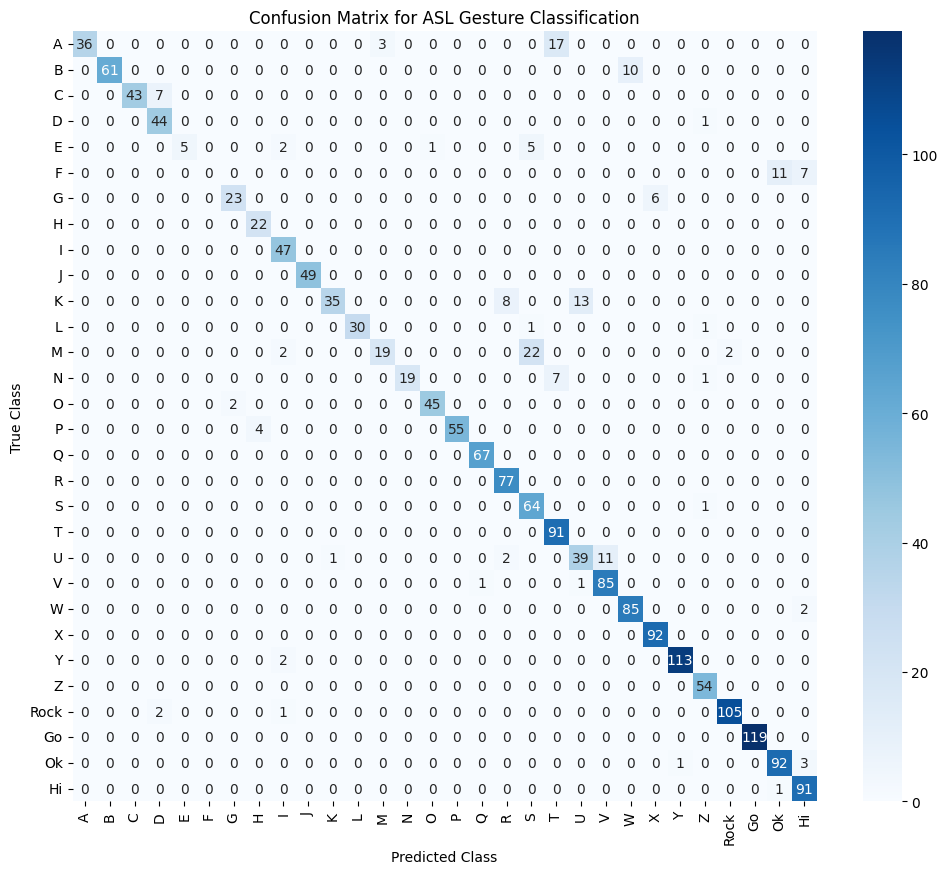

              precision    recall  f1-score   support

           A       1.00      0.64      0.78        56
           B       1.00      0.86      0.92        71
           C       1.00      0.86      0.92        50
           D       0.83      0.98      0.90        45
           E       1.00      0.38      0.56        13
           F       0.00      0.00      0.00        18
           G       0.92      0.79      0.85        29
           H       0.85      1.00      0.92        22
           I       0.87      1.00      0.93        47
           J       1.00      1.00      1.00        49
           K       0.97      0.62      0.76        56
           L       1.00      0.94      0.97        32
           M       0.86      0.42      0.57        45
           N       1.00      0.70      0.83        27
           O       0.98      0.96      0.97        47
           P       1.00      0.93      0.96        59
           Q       0.99      1.00      0.99        67
           R       0.89    

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_Test, Y_Test are already defined from train_test_split
# Load the trained model (Keras format, assuming saved as HDF5)
model = tf.keras.models.load_model('model/keypoint_classifier/handsigns.h5')

# Make predictions on the test set
Y_Pred_Probs = model.predict(X_Test)
Y_Pred = np.argmax(Y_Pred_Probs, axis=1)  # Convert probabilities to class indices

# Compute the confusion matrix
cm = confusion_matrix(Y_Test, Y_Pred)

# Define class labels (assuming 0-29 map to A-Z, space, delete, nothing, etc.)
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 
                'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Rock', 'Go', 'Ok', 'Hi']

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for ASL Gesture Classification')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Print classification report for additional metrics
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred, target_names=class_labels))